# **Time Series Gold Forcasting (1968-2025)**

## **Data Understanding**

### Basic Information

* Total rows: `14,496`
* Columns: 2

  1. `Date` → datetime (`1968-03-22` to `2025`)
  2. `gold_price_usd` → float (gold price in USD)

---

### Date Column

* Type: `datetime64[ns]`
* No missing values
* Represents daily gold price records from 1968 onward.

---

### Gold Price Column (`gold_price_usd`)

* Type: `float64`
* No missing values
* Min: 34.95 USD
* Max: 3,983.40 USD
* Mean: 711.86 USD
* Median: 394.58 USD
* 25% Quantile: 299.60 USD
* 75% Quantile: 1,202.31 USD

---

### Insights

* Data is complete (no nulls).
* Price range shows a large increase over time.
* Distribution is likely right-skewed (mean > median), indicating more recent higher prices.
* This dataset is suitable for time series analysis (trend, forecasting, volatility, etc.).

## **Data Preparation**

### Download Data from Yahoo Finance (2000 - 2025)

In [1]:
# import os
# import yfinance as yf

# # Define the ticker symbol
# ticker_symbol = "GC=F"

# # Create a Ticker object
# ticker = yf.Ticker(ticker_symbol)

# # Fetch historical market data
# historical_data = ticker.history(period="max")
# print("Historical Data:")
# print(historical_data)

# # Fetch basic financials
# financials = ticker.financials
# print("\nFinancials:")
# print(financials)

# # Fetch stock actions like dividends and splits
# actions = ticker.actions
# print("\nStock Actions:")
# print(actions)

# # Save historical data to a CSV file
# os.makedirs("data", exist_ok=True)
# historical_data.to_excel("data/gold_2000-2025.xlsx")

### Data Merging

In [ ]:
# import pandas as pd
# df_gold_1968_2024 = pd.read_excel('data/Nilai Emas dalam USD.xlsx', parse_dates=['Date'])
# df_gold_2000_2025 = pd.read_excel('data/gold_2000-2025.xlsx', parse_dates=['Date'])

In [ ]:
# # Step 1: Normalize the Date columns (remove timezone info and ensure consistent format)
# import pandas as pd

# # Create copies of the datasets to avoid modifying originals
# df1 = df_gold_1968_2024.copy()
# df2 = df_gold_2000_2025.copy()

# # Normalize dates (remove timezone information)
# df1['Date'] = pd.to_datetime(df1['Date']).dt.date
# # For df2, first convert to UTC then to date to handle timezone
# df2['Date'] = pd.to_datetime(df2['Date'], utc=True).dt.date

# # Rename columns to English standard names
# df1_normalized = df1.rename(columns={'Price_USD_Gold': 'gold_price_usd'})
# df2_normalized = df2[['Date', 'Close']].rename(columns={'Close': 'gold_price_usd'})

# # Step 2: Merge datasets with priority to df_gold_1968_2024
# # First, find overlapping dates
# df1_dates = set(df1_normalized['Date'])
# df2_dates = set(df2_normalized['Date'])
# overlapping_dates = df1_dates.intersection(df2_dates)

# # Remove overlapping dates from df2 (since df1 takes priority)
# df2_filtered = df2_normalized[~df2_normalized['Date'].isin(overlapping_dates)]

# # Combine the datasets
# merged_gold_data = pd.concat([df1_normalized, df2_filtered], ignore_index=True)

# # Sort by date
# merged_gold_data = merged_gold_data.sort_values('Date').reset_index(drop=True)

# # Convert Date back to datetime for easier manipulation
# merged_gold_data['Date'] = pd.to_datetime(merged_gold_data['Date'])

# # Save the merged dataset
# merged_gold_data.to_excel('data/gold_1968-2025.xlsx', index=False)

## **Exploratory Data Analysis (EDA)**

### Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [2]:
# Load dataset
file_path = 'data/gold_1968-2025.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14496 entries, 0 to 14495
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            14496 non-null  datetime64[ns]
 1   gold_price_usd  14496 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 226.6 KB


### Basic Descriptive Statistics

In [4]:
# Descriptive stats
print("\nDescriptive Statistics:")
print(df.describe())

# Date range
print(f"\nDate range: {df['Date'].min().date()} to {df['Date'].max().date()}")


Descriptive Statistics:
                                Date  gold_price_usd
count                          14496       14,496.00
mean   1997-09-25 11:53:38.543046400          711.86
min              1968-03-22 00:00:00           34.95
25%              1983-11-01 18:00:00          299.60
50%              1997-11-17 12:00:00          394.58
75%              2011-10-19 06:00:00        1,202.31
max              2025-10-07 00:00:00        3,983.40
std                              NaN          652.84

Date range: 1968-03-22 to 2025-10-07


### Gold Price Trend Over Time

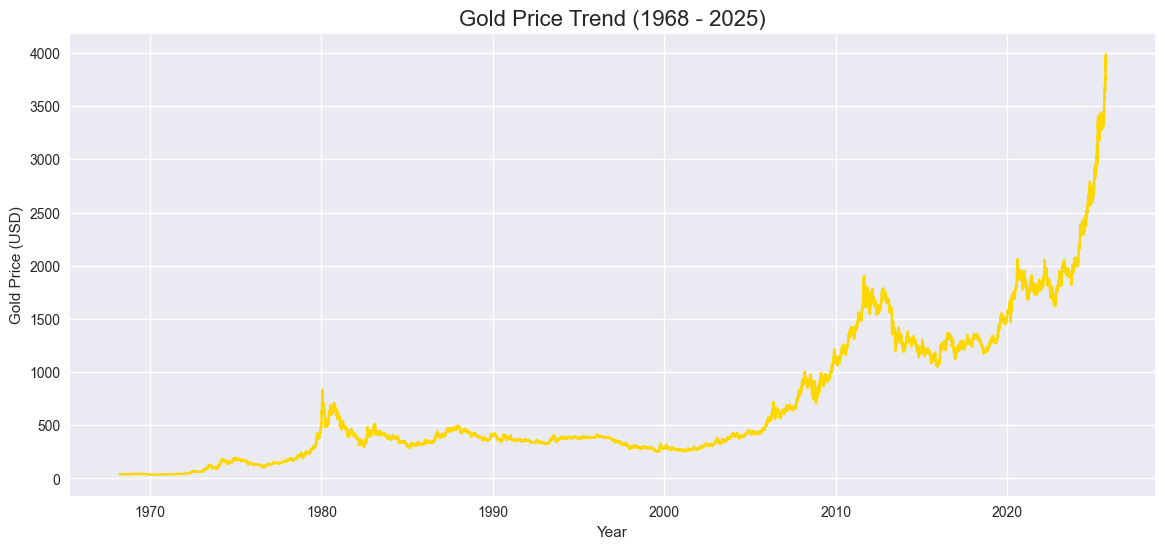

In [5]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['gold_price_usd'], color='gold')
plt.title('Gold Price Trend (1968 - 2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Gold Price (USD)')
plt.grid(True)
plt.show()

### Monthly Price

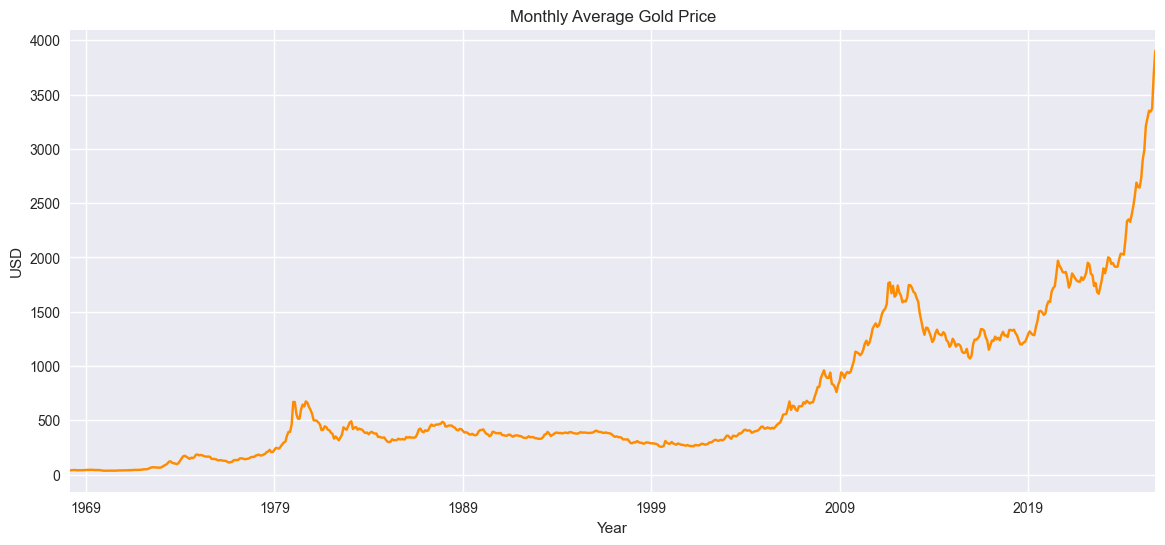

In [6]:
# Convert Date to index for resampling
df = df.set_index('Date')

# Monthly average
monthly = df['gold_price_usd'].resample('M').mean()

plt.figure(figsize=(14,6))
monthly.plot(color='darkorange')
plt.title('Monthly Average Gold Price')
plt.xlabel('Year')
plt.ylabel('USD')
plt.grid(True)
plt.show()

### Yearly Gold Price

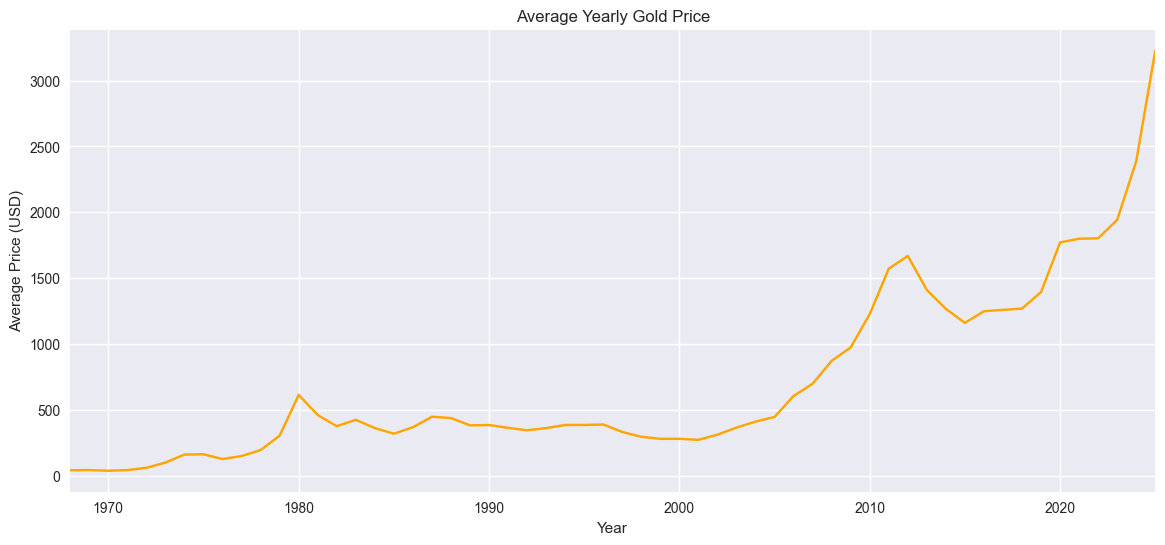

In [7]:
# Monthly average
yearly_avg = df['gold_price_usd'].resample('Y').mean()

plt.figure(figsize=(14,6))
yearly_avg.plot(kind='line', color='orange')
plt.title('Average Yearly Gold Price')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

### Daily Change

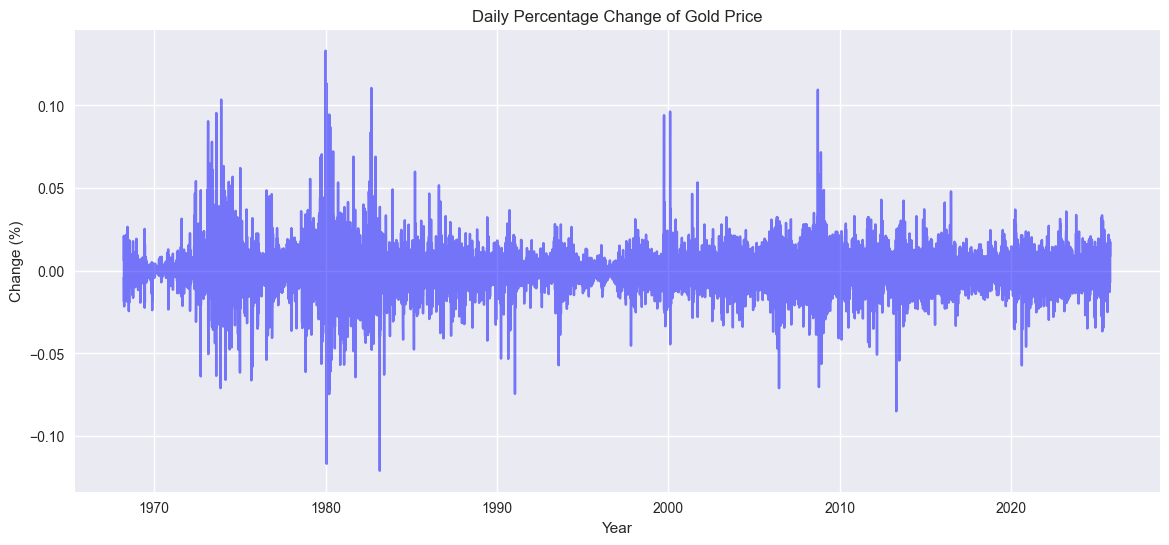

count   14,495.00
mean         0.00
std          0.01
min         -0.12
25%         -0.00
50%          0.00
75%          0.01
max          0.13
Name: Daily_Change, dtype: float64


In [9]:
# Calculate daily return
df['Daily_Change'] = df['gold_price_usd'].pct_change()

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Daily_Change'], color='blue', alpha=0.5)
plt.title('Daily Percentage Change of Gold Price')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.grid(True)
plt.show()

# Summary of daily change
print(df['Daily_Change'].describe())